In [876]:
import pandas as pd

# Data Import

## Import User Profile Data

In [877]:
profile = pd.read_json('./Starbucks/profile.json', lines=True)

In [878]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [879]:
profile.shape

(17000, 5)

### How many NaN values do we have

In [880]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

### That's a lot, will have to impute values somehow

## Breakdown the gender field

In [881]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

### None values in gender field are empty, fill with not specified

## Import Offer Transcript Data

In [882]:
transcript = pd.read_json('./Starbucks/transcript.json', lines = True)

In [883]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [884]:
transcript.shape

(306534, 4)

### What are the possible events?

In [885]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### What is the time field?

In [886]:
transcript.time.value_counts()

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

### Looks like it is amount of time in hours since the start of dataset

## Import portfolio json

In [887]:
portfolio = pd.read_json('./Starbucks/portfolio.json', lines = True)

In [888]:
portfolio.head()

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [889]:
portfolio.shape

(10, 6)

In [890]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

### Going to need to dumify channels column, and it looks like easy merges to single DF

# Defining Color Pallete

In [891]:
color1 = '#00704A'
color2 = '#FF9FE5'
color3 = '#45062E'
backgroundColor = '#B8A085'
ccs = ['#ACDDA9', '#00704A', '#002F20']
dcs = ['#002619','#008256', '#00de92', '#a1ffdf', '#fdfffe']

# Data Wrangling

## Cleaning Profile

In [892]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

### Fill empty 'gender' values with NS (not specified)

In [893]:
profile['gender'] = profile.gender.fillna('NS')
profile.gender.value_counts()

M     8484
F     6129
NS    2175
O      212
Name: gender, dtype: int64

### Visualize Gender Breakdown

In [894]:
import plotly.express as px
s = profile.gender.value_counts().rename_axis('gender').reset_index(name='counts')
s



gender  counts
0      M    8484
1      F    6129
2     NS    2175
3      O     212

In [895]:
s = profile.gender.value_counts().rename_axis('gender').reset_index(name='counts')
fig = px.bar(s, x = 'gender', y='counts', color = 'gender', color_discrete_sequence= dcs,
                  title = 'Distribution of Gender of Customer',
                   labels = {
                       'variable':'',
                       'gender':'Gender'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Gender',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        ticktext = ['Male', 'Female', 'Not Specified', 'Other'],
        tickvals = ['M', 'F', 'NS', 'O'],
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98,
        bgcolor = '#DFBA8F',
        bordercolor = 'black',
        borderwidth = 2,
        font = dict(
            color = 'black'
        )
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
newnames = {'M':'Male', 'F':'Female', 'NS':'Not Specified', 'O':'Other'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

### Distribution of Age Field looks suspicious

In [896]:
fig = px.histogram(profile, x = 'age' ,color_discrete_sequence=[color1,color2 ],nbins=200,
                  title = 'Distribution of Age of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Age (years)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

#### Looks like the value 118 is filled in for not specified
+ can we impute the age based on income?
+ create a new column for age specified or not

In [897]:
profile.loc[profile['age']==118].income.value_counts()

Series([], Name: income, dtype: int64)

##### Every single entry which specified age as 118 did not specify income either, does it run the other way?

In [898]:
profile.loc[profile['income'].isna()].age.value_counts()

118    2175
Name: age, dtype: int64

##### Sure does, there is a large group of customer profiles (n = 2175, 13%) with unspecified information in any field. How do we fix this?
+ This is too many values to impute a single number for
+ add a new binary column for anonymous users
+ fill in fields with a normal distribution equal to the remaining data

In [899]:
import numpy as np
profile['anonymous'] = 0
profile['anonymous'] = np.where(profile['age']== 118, 1, 0)
profile

gender  age                                id  became_member_on  \
0         NS  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

#### Find std and mean of age field without '118' values

In [900]:
ageSTD = np.std(profile.loc[profile['age']!= 118].age)
ageSTD

17.383119058990765

In [901]:
ageMean = np.mean(profile.loc[profile['age']!= 118].age)
ageMean

54.39352445193929

In [902]:
from scipy.stats import truncnorm
lower, upper = 18, 101
mu, sigma = ageMean, ageSTD
X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

profile.loc[profile['age']==118, ['age']] = X.rvs(len(profile.loc[profile['age']==118, ['age']]))
profile

gender        age                                id  became_member_on  \
0         NS  65.367812  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F  55.000000  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  26.947810  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F  75.000000  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  59.114102  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...        ...                               ...               ...   
16995      F  45.000000  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M  61.000000  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M  49.000000  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F  83.000000  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F  62.000000  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

In [903]:
profile.loc[:,['age']] = profile.age.round()
profile


gender   age                                id  became_member_on  \
0         NS  65.0  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F  55.0  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS  27.0  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F  75.0  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS  59.0  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...   ...                               ...               ...   
16995      F  45.0  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M  61.0  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M  49.0  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F  83.0  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F  62.0  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

In [904]:
profile.loc[:,['age']] = pd.to_numeric(profile.age, downcast='integer')
profile

gender  age                                id  became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   59  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous  
0           NaN          1  
1      112000.0          0  
2           NaN          1  
3      100000.0          0  
4           NaN          1  
...         ...        ...  
16995   54000.0          0  
16996   72000.0          0  
16997   73000.0          0  
16998   50000.0          0  
16999   82000.0          0  

[17000 rows x 6 columns]

#### Evaluate changes

In [905]:
ageSTD - np.std(profile.age)

0.11911055959734895

In [906]:
ageMean - np.mean(profile.age)

-0.039534371590121964

In [907]:
fig = px.histogram(profile, x = 'age' ,color_discrete_sequence=[color1,color2 ],nbins=102-18,
                  title = 'Distribution of Age of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Age (years)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

### Let's do the same with the Income field

#### Initial distribution

In [908]:
fig = px.histogram(profile, x = 'income' ,color_discrete_sequence=[color1,color2 ],nbins=150,
                  title = 'Distribution of Income of Customer',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Income ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

#### From the look of this distribution it may be worthwhile to cluster and generate values from a uniform distribution across clusters

In [909]:
from sklearn.cluster import KMeans
from PlottingFunctions import plot_inertia, plot_silhouette

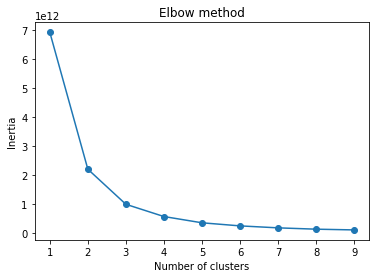

KMeans(n_clusters=4)

In [910]:
kmeans = KMeans()
yClus = profile.loc[profile['income'].notna(), ['income']]
plot_inertia(kmeans, yClus, range(1, 10))



kmeans.set_params(n_clusters = 4)
kmeans.fit(profile.loc[profile['income'].notna(), ['income']])

In [911]:
kmeans.labels_

array([1, 1, 3, ..., 3, 0, 3])

### Lets test this out, lets create a copy of the DF and create a new column for income cluster and see what it looks like

In [912]:
profileCopy = profile
profileCopy['income_cluster'] = np.nan

In [913]:
profileCopy.loc[profileCopy['income'].notna(), ['income_cluster']] = kmeans.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [914]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   59  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0           NaN          1            NaN  
1      112000.0          0            1.0  
2           NaN          1            NaN  
3      100000.0          0            1.0  
4           NaN          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            0.0  
16996   72000.0          0            3.0  
16997   73000.0          0            3.0  
16998   50000.0          0            0.0  
16999   82000.0          0            3.0  

[17000 rows x 7 columns]

In [915]:
fig = px.histogram(profileCopy.loc[profileCopy['income'].notna()], x = 'income' ,color = 'income_cluster',nbins=150, 
                   color_discrete_sequence=dcs,
                  title = 'Distribution of Income of Customer by Cluster',
                   labels = {
                       'income_cluster':'Income Cluster'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Income ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.001,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
newnames = {'1.0':'Cluster 1', '3.0':'Cluster 3', '0.0':'Cluster 0', '2.0':'Cluster 2', '4.0': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

### Now that our income is clustered let's see if there is any relationship between non anonymous users age and income

In [916]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',title = 'Income vs Age',
                         color_discrete_sequence = [color1],

                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age($)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()


#### Not Great what if we group by cluster

In [917]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     29.04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.71e-08
Time:                        14:47:10   Log-Likelihood:                -27278.
No. Observations:                2591   AIC:                         5.456e+04
Df Residuals:                    2589   BIC:                         5.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.512e+04    930.092    102.274      0.0

#### This plot clearly shows 4 clusters, lets try heirarchal clustering

In [918]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [919]:
hier.set_params(n_clusters = 4, affinity = 'manhattan', linkage = 'average')
hier.fit(profile.loc[profile['income'].notna(), ['income', 'age']])


AgglomerativeClustering(affinity='manhattan', linkage='average', n_clusters=4)

In [920]:
profileCopy = profile
profileCopy['income_cluster'] = np.nan

In [921]:
profileCopy.loc[profileCopy['income'].notna(), ['income_cluster']] = hier.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [922]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   59  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0           NaN          1            NaN  
1      112000.0          0            1.0  
2           NaN          1            NaN  
3      100000.0          0            3.0  
4           NaN          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            0.0  
16996   72000.0          0            0.0  
16997   73000.0          0            0.0  
16998   50000.0          0            0.0  
16999   82000.0          0            0.0  

[17000 rows x 7 columns]

In [923]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'income_cluster':'Income Cluster'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='left',
        x = 1.05
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
newnames = {'1.0':'Cluster 1', '3.0':'Cluster 3', '0.0':'Cluster 0', '2.0':'Cluster 2', '4.0': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03467
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.852
Time:                        14:47:30   Log-Likelihood:                -9562.7
No. Observations:                 958   AIC:                         1.913e+04
Df Residuals:                     956   BIC:                         1.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.106e+05    991.419    111.554      0.0

#### Impute Income based on age for NaN values

+ Distributions look uniform or poisson  
+ For each NaN value, pick a random sample (n=1) in that cluster to encode Income

In [924]:
#find percentage of observations for each cluster
c0Per = len(profileCopy.loc[profileCopy['income_cluster']==0.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c1Per = len(profileCopy.loc[profileCopy['income_cluster']==1.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c2Per = len(profileCopy.loc[profileCopy['income_cluster']==2.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
c3Per = len(profileCopy.loc[profileCopy['income_cluster']==3.0])/len(profileCopy.loc[profileCopy['income_cluster'].notna()])
print([c0Per, c1Per, c2Per, c3Per])

[0.5334907251264756, 0.06462057335581788, 0.24445193929173692, 0.15743676222596964]


In [925]:
profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]

income
5867  32000.0

In [926]:
for i in profileCopy.loc[profileCopy['income'].isna()].index:
    targetAge = profileCopy['age'][i]
    if targetAge >= 48:
        randomCluster = 1.0
        #randomCluster = np.random.choice([0.0, 1.0, 2.0, 3.0], p =[c0Per, c1Per, c2Per, c3Per])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
    if targetAge >= 36:
        randomCluster = np.random.choice([1.0, 3.0], p=[
            len(profileCopy.loc[profileCopy['income_cluster']==1.0])/len(profileCopy.loc[profileCopy['income_cluster'].isin([1.0, 3.0])]),
            len(profileCopy.loc[profileCopy['income_cluster']==3.0])/len(profileCopy.loc[profileCopy['income_cluster'].isin([1.0, 3.0])])
        ])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
    else:
        randomCluster = np.random.choice([0.0, 1.0, 2.0, 3.0], p =[c0Per, c1Per, c2Per, c3Per])
        randomIncome = profileCopy.loc[profileCopy['income_cluster']==randomCluster].sample().loc[:,['income']]
        #print(randomIncome)
        profileCopy.iloc[i,4] = randomIncome
        
    
    

In [927]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   59  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0       99000.0          1            NaN  
1      112000.0          0            1.0  
2       50000.0          1            NaN  
3      100000.0          0            3.0  
4      118000.0          1            NaN  
...         ...        ...            ...  
16995   54000.0          0            0.0  
16996   72000.0          0            0.0  
16997   73000.0          0            0.0  
16998   50000.0          0            0.0  
16999   82000.0          0            0.0  

[17000 rows x 7 columns]

#### Let's recluster and look at the results

In [928]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = profileCopy.loc[:,['income', 'age']]
scaled = scaler.fit_transform(s)


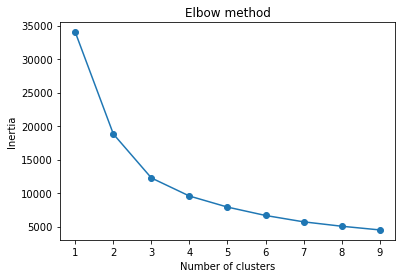

In [929]:
hier = AgglomerativeClustering()
kmeans = KMeans()
plot_inertia(kmeans, scaled, range(1,10))

In [930]:

hier.set_params(n_clusters = 3)
hier.fit(scaled)
hier.labels_

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [931]:
profileCopy.loc[:, ['income_cluster']] = hier.labels_
# for income cluster to categorical
profileCopy['income_cluster'] = profileCopy['income_cluster'].astype('category')

In [932]:
profileCopy

gender  age                                id  became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4         NS   59  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  anonymous income_cluster  
0       99000.0          1              0  
1      112000.0          0              0  
2       50000.0          1              2  
3      100000.0          0              0  
4      118000.0          1              0  
...         ...        ...            ...  
16995   54000.0          0              1  
16996   72000.0          0              1  
16997   73000.0          0              1  
16998   50000.0          0              1  
16999   82000.0          0              1  

[17000 rows x 7 columns]

In [933]:
fig = px.scatter(profileCopy.loc[profileCopy['anonymous']==0], y = 'income', x ='age',color = 'income_cluster',title = 'Income vs Age',
                         color_discrete_sequence = dcs,
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'income_cluster':'Income Cluster'}
                )


fig.update_layout(
    yaxis_title = 'Income ($)',
    xaxis_title = 'Age(years)',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='left',
        x = 1.05
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
newnames = {'1':'Cluster 1', '3':'Cluster 3', '0':'Cluster 0', '2':'Cluster 2', '4': 'Cluster 4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                       legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                      )
                   )
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     30.18
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           4.20e-08
Time:                        14:48:17   Log-Likelihood:                -39620.
No. Observations:                3697   AIC:                         7.924e+04
Df Residuals:                    3695   BIC:                         7.926e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.009e+04    910.132     98.990      0.0

### Look for NaN values in income and age

In [934]:
profileCopy.isna().any()

gender              False
age                 False
id                  False
became_member_on    False
income              False
anonymous           False
income_cluster      False
dtype: bool

### Let's Change the joined column into datetime

In [935]:
profileCopy['became_member_on'] = pd.to_datetime(profileCopy['became_member_on'], format = '%Y%m%d')
profileCopy

gender  age                                id became_member_on  \
0         NS   65  68be06ca386d4c31939f3a4f0e3dd783       2017-02-12   
1          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
2         NS   27  38fe809add3b4fcf9315a9694bb96ff5       2018-07-12   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
4         NS   59  a03223e636434f42ac4c3df47e8bac43       2017-08-04   
...      ...  ...                               ...              ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
16997      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income  anonymous income_cluster  
0       99000.0          1              0  
1      112000.0          0              0  
2       50000.0          1              2  
3      100000.0          0              0  
4      118000.0          1              0  
...         ...        ...            ...  
16995   54000.0          0              1  
16996   72000.0          0              1  
16997   73000.0          0              1  
16998   50000.0          0              1  
16999   82000.0          0              1  

[17000 rows x 7 columns]

## Let's clean up the transcript

In [936]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [937]:
transcript

person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
1       a03223e636434f42ac4c3df47e8bac43  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4       68617ca6246f4fbc85e91a2a49552598  offer received   
...                                  ...             ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   
306531  a00058cf10334a308c68e7631c529907     transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   

                                                   value  time  
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1       {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3       {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4       {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
...                                                  ...   ...  
306529                    {'amount': 1.5899999999999999}   714  
306530                                  {'amount': 9.53}   714  
306531                                  {'amount': 3.61}   714  
306532                    {'amount': 3.5300000000000002}   714  
306533                                  {'amount': 4.05}   714  

[306534 rows x 4 columns]

### Looks like it would be benficial to split the DF into offers and transactions

In [938]:
transcriptT = pd.read_csv('transcriptT.csv')
transcriptO = pd.read_csv('transcriptO.csv')
#transcriptO = transcript.loc[transcript['event']!= 'transaction']
#transcriptT = transcript.loc[transcript['event']== 'transaction']
#transcriptO.reset_index(drop=True, inplace = True)
#transcriptT.reset_index(drop=True, inplace = True)
#transcriptO

### The dictionary in the value column is pointless, lets extract values

In [939]:
#transcriptO['offer_id'] = np.nan


# Takes a long time to run the below code

In [940]:
#for i in transcriptO.index:
#    transcriptO.iloc[i,4] = list(dict.values(transcriptO.iloc[i].value))[0]

In [941]:
#transcriptO

### Let's look at the distribution of the event column

In [942]:
s = transcriptO.event.value_counts().rename_axis('events').reset_index(name='counts')
fig = px.bar(s, x = 'events', y='counts', color = 'events', color_discrete_sequence= dcs,
                  title = 'Distribution of Event Type',
                   labels = {
                       'variable':'',
                       'events':'Event Type',
                       'offer received':'Offer Received'
                   }
                  )
fig.update_layout(
    xaxis_title = 'Event',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = backgroundColor,
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black'
    ),
    xaxis = dict(
        #ticktext = ['Male', 'Female', 'Not Specified', 'Other'],
        #tickvals = ['M', 'F', 'NS', 'O'],
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black'     
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98,
        bgcolor = '#DFBA8F',
        bordercolor = 'black',
        borderwidth = 2,
        font = dict(
            color = 'black'
        )
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"
)
#newnames = {'M':'Male', 'F':'Female', 'NS':'Not Specified', 'O':'Other'}
#fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
#                                      legendgroup = newnames[t.name],
#                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
#                                     )
#                  )

### Almost a 50% conversion rate, not bad

In [943]:
transcriptT

Unnamed: 0                            person        event  \
0                0  02c083884c7d45b39cc68e1314fec56c  transaction   
1                1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   
2                2  54890f68699049c2a04d415abc25e717  transaction   
3                3  b2f1cd155b864803ad8334cdf13c4bd2  transaction   
4                4  fe97aa22dd3e48c8b143116a8403dd52  transaction   
...            ...                               ...          ...   
138948      138948  b3a1272bc9904337b331bf348c3e8c17  transaction   
138949      138949  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   
138950      138950  a00058cf10334a308c68e7631c529907  transaction   
138951      138951  76ddbd6576844afe811f1a3c0fbb5bec  transaction   
138952      138952  c02b10e8752c4d8e9b73f918558531f7  transaction   

                                 value  time  spent  
0       {'amount': 0.8300000000000001}     0   0.83  
1                    {'amount': 34.56}     0  34.56  
2                    {'amount': 13.23}     0  13.23  
3                    {'amount': 19.51}     0  19.51  
4                    {'amount': 18.97}     0  18.97  
...                                ...   ...    ...  
138948  {'amount': 1.5899999999999999}   714   1.59  
138949                {'amount': 9.53}   714   9.53  
138950                {'amount': 3.61}   714   3.61  
138951  {'amount': 3.5300000000000002}   714   3.53  
138952                {'amount': 4.05}   714   4.05  

[138953 rows x 6 columns]

In [944]:
#transcriptT['spent'] = np.nan
#for i in transcriptT.index:
#    transcriptT.iloc[i,4] = list(dict.values(transcriptT.iloc[i].value))[0]

In [945]:
transcriptT

Unnamed: 0                            person        event  \
0                0  02c083884c7d45b39cc68e1314fec56c  transaction   
1                1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   
2                2  54890f68699049c2a04d415abc25e717  transaction   
3                3  b2f1cd155b864803ad8334cdf13c4bd2  transaction   
4                4  fe97aa22dd3e48c8b143116a8403dd52  transaction   
...            ...                               ...          ...   
138948      138948  b3a1272bc9904337b331bf348c3e8c17  transaction   
138949      138949  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   
138950      138950  a00058cf10334a308c68e7631c529907  transaction   
138951      138951  76ddbd6576844afe811f1a3c0fbb5bec  transaction   
138952      138952  c02b10e8752c4d8e9b73f918558531f7  transaction   

                                 value  time  spent  
0       {'amount': 0.8300000000000001}     0   0.83  
1                    {'amount': 34.56}     0  34.56  
2                    {'amount': 13.23}     0  13.23  
3                    {'amount': 19.51}     0  19.51  
4                    {'amount': 18.97}     0  18.97  
...                                ...   ...    ...  
138948  {'amount': 1.5899999999999999}   714   1.59  
138949                {'amount': 9.53}   714   9.53  
138950                {'amount': 3.61}   714   3.61  
138951  {'amount': 3.5300000000000002}   714   3.53  
138952                {'amount': 4.05}   714   4.05  

[138953 rows x 6 columns]

## SO I dont have to transform those fields again export to csv

In [946]:
#transcriptT.to_csv('transcriptT.csv')
#transcriptO.to_csv('transcriptO.csv')

## Let's look at portfolio

In [947]:
portfolio = pd.read_json('./Starbucks/portfolio.json', lines = True)

### Dummify channels column

In [948]:
portfolio[['web', 'email','mobile','social']] = 0
#convert channels to string
#portfolio.loc[:,'channels'] = portfolio['channels'].astype('string')

In [949]:
chans = ['web', 'email','mobile', 'social']
for i in portfolio.index:
    for j in chans:
        if j in portfolio.loc[i,'channels']:
            print(portfolio.loc[i,['channels']])
            portfolio.loc[i,j] = 1

channels    [email, mobile, social]
Name: 0, dtype: object
channels    [email, mobile, social]
Name: 0, dtype: object
channels    [email, mobile, social]
Name: 0, dtype: object
channels    [web, email, mobile, social]
Name: 1, dtype: object
channels    [web, email, mobile, social]
Name: 1, dtype: object
channels    [web, email, mobile, social]
Name: 1, dtype: object
channels    [web, email, mobile, social]
Name: 1, dtype: object
channels    [web, email, mobile]
Name: 2, dtype: object
channels    [web, email, mobile]
Name: 2, dtype: object
channels    [web, email, mobile]
Name: 2, dtype: object
channels    [web, email, mobile]
Name: 3, dtype: object
channels    [web, email, mobile]
Name: 3, dtype: object
channels    [web, email, mobile]
Name: 3, dtype: object
channels    [web, email]
Name: 4, dtype: object
channels    [web, email]
Name: 4, dtype: object
channels    [web, email, mobile, social]
Name: 5, dtype: object
channels    [web, email, mobile, social]
Name: 5, dtype: object
channel

In [950]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  web  email  mobile  social  
0  ae264e3637204a6fb9bb56bc8210ddfd    0      1       1       1  
1  4d5c57ea9a6940dd891ad53e9dbe8da0    1      1       1       1  
2  3f207df678b143eea3cee63160fa8bed    1      1       1       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9    1      1       1       0  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7    1      1       0       0  
5  2298d6c36e964ae4a3e7e9706d1fb8c2    1      1       1       1  
6  fafdcd668e3743c1bb461111dcafc2a4    1      1       1       1  
7  5a8bc65990b245e5a138643cd4eb9837    0      1       1       1  
8  f19421c1d4aa40978ebb69ca19b0e20d    1      1       1       1  
9  2906b810c7d4411798c6938adc9daaa5    1      1       1       0

# Let's Merge

In [951]:
M1 = transcriptO.merge(portfolio, how = 'left', left_on = 'offer_id', right_on='id')
M1.drop(['value', 'channels', 'id'], axis = 1, inplace = True)
M1

Unnamed: 0                            person            event  time  \
0                0  78afa995795e4d85b5d9ceeca43f5fef   offer received     0   
1                1  a03223e636434f42ac4c3df47e8bac43   offer received     0   
2                2  e2127556f4f64592b11af22de27a7932   offer received     0   
3                3  8ec6ce2a7e7949b1bf142def7d0e0586   offer received     0   
4                4  68617ca6246f4fbc85e91a2a49552598   offer received     0   
...            ...                               ...              ...   ...   
167576      167576  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   714   
167577      167577  b895c57e8cd047a8872ce02aa54759d6  offer completed   714   
167578      167578  8dda575c2a1d44b9ac8e8b07b93d1f8e     offer viewed   714   
167579      167579  8431c16f8e1d440880db371a68f82dd0  offer completed   714   
167580      167580  24f56b5e1849462093931b164eb803b5  offer completed   714   

                                offer_id  reward  difficulty  duration  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9       5           5         7   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7       5          20        10   
2       2906b810c7d4411798c6938adc9daaa5       2          10         7   
3       fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
4       4d5c57ea9a6940dd891ad53e9dbe8da0      10          10         5   
...                                  ...     ...         ...       ...   
167576  2298d6c36e964ae4a3e7e9706d1fb8c2       3           7         7   
167577  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
167578  0b1e1539f2cc45b7b9fa7c272da2e1d7       5          20        10   
167579  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
167580  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   

       offer_type  web  email  mobile  social  
0            bogo    1      1       1       0  
1        discount    1      1       0       0  
2        discount    1      1       1       0  
3        discount    1      1       1       1  
4            bogo    1      1       1       1  
...           ...  ...    ...     ...     ...  
167576   discount    1      1       1       1  
167577   discount    1      1       1       1  
167578   discount    1      1       0       0  
167579   discount    1      1       1       1  
167580   discount    1      1       1       1  

[167581 rows x 13 columns]

In [952]:
M1.isna().any()

Unnamed: 0    False
person        False
event         False
time          False
offer_id      False
reward        False
difficulty    False
duration      False
offer_type    False
web           False
email         False
mobile        False
social        False
dtype: bool

In [953]:
df = M1.merge(profile, how = 'left', right_on = 'id', left_on = 'person')
df.drop(['id'], axis =1, inplace=True)
df

Unnamed: 0                            person            event  time  \
0                0  78afa995795e4d85b5d9ceeca43f5fef   offer received     0   
1                1  a03223e636434f42ac4c3df47e8bac43   offer received     0   
2                2  e2127556f4f64592b11af22de27a7932   offer received     0   
3                3  8ec6ce2a7e7949b1bf142def7d0e0586   offer received     0   
4                4  68617ca6246f4fbc85e91a2a49552598   offer received     0   
...            ...                               ...              ...   ...   
167576      167576  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   714   
167577      167577  b895c57e8cd047a8872ce02aa54759d6  offer completed   714   
167578      167578  8dda575c2a1d44b9ac8e8b07b93d1f8e     offer viewed   714   
167579      167579  8431c16f8e1d440880db371a68f82dd0  offer completed   714   
167580      167580  24f56b5e1849462093931b164eb803b5  offer completed   714   

                                offer_id  reward  difficulty  duration  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9       5           5         7   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7       5          20        10   
2       2906b810c7d4411798c6938adc9daaa5       2          10         7   
3       fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
4       4d5c57ea9a6940dd891ad53e9dbe8da0      10          10         5   
...                                  ...     ...         ...       ...   
167576  2298d6c36e964ae4a3e7e9706d1fb8c2       3           7         7   
167577  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
167578  0b1e1539f2cc45b7b9fa7c272da2e1d7       5          20        10   
167579  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
167580  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   

       offer_type  web  email  mobile  social gender  age became_member_on  \
0            bogo    1      1       1       0      F   75       2017-05-09   
1        discount    1      1       0       0     NS   59       2017-08-04   
2        discount    1      1       1       0      M   68       2018-04-26   
3        discount    1      1       1       1     NS   28       2017-09-25   
4            bogo    1      1       1       1     NS   59       2017-10-02   
...           ...  ...    ...     ...     ...    ...  ...              ...   
167576   discount    1      1       1       1     NS   66       2017-01-16   
167577   discount    1      1       1       1     NS   63       2017-01-25   
167578   discount    1      1       0       0      F   60       2017-09-08   
167579   discount    1      1       1       1      M   39       2018-06-27   
167580   discount    1      1       1       1      F   48       2017-12-28   

          income  anonymous income_cluster  
0       100000.0          0              0  
1       118000.0          1              0  
2        70000.0          0              1  
3        49000.0          1              2  
4       116000.0          1              0  
...          ...        ...            ...  
167576  103000.0          1              0  
167577   83000.0          1              0  
167578   64000.0          0              1  
167579   39000.0          0              2  
167580   80000.0          0              0  

[167581 rows x 19 columns]

In [954]:
df.isna().any()

Unnamed: 0          False
person              False
event               False
time                False
offer_id            False
reward              False
difficulty          False
duration            False
offer_type          False
web                 False
email               False
mobile              False
social              False
gender              False
age                 False
became_member_on    False
income              False
anonymous           False
income_cluster      False
dtype: bool

In [955]:
transcriptT

Unnamed: 0                            person        event  \
0                0  02c083884c7d45b39cc68e1314fec56c  transaction   
1                1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction   
2                2  54890f68699049c2a04d415abc25e717  transaction   
3                3  b2f1cd155b864803ad8334cdf13c4bd2  transaction   
4                4  fe97aa22dd3e48c8b143116a8403dd52  transaction   
...            ...                               ...          ...   
138948      138948  b3a1272bc9904337b331bf348c3e8c17  transaction   
138949      138949  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   
138950      138950  a00058cf10334a308c68e7631c529907  transaction   
138951      138951  76ddbd6576844afe811f1a3c0fbb5bec  transaction   
138952      138952  c02b10e8752c4d8e9b73f918558531f7  transaction   

                                 value  time  spent  
0       {'amount': 0.8300000000000001}     0   0.83  
1                    {'amount': 34.56}     0  34.56  
2                    {'amount': 13.23}     0  13.23  
3                    {'amount': 19.51}     0  19.51  
4                    {'amount': 18.97}     0  18.97  
...                                ...   ...    ...  
138948  {'amount': 1.5899999999999999}   714   1.59  
138949                {'amount': 9.53}   714   9.53  
138950                {'amount': 3.61}   714   3.61  
138951  {'amount': 3.5300000000000002}   714   3.53  
138952                {'amount': 4.05}   714   4.05  

[138953 rows x 6 columns]

In [956]:
transcript.to_csv('./purchases.csv')
df.to_csv('./transactions.csv')

# This concludes this notebook, next file: Data Exploration